# Data Analysis

In this part, we will explore the dataset.

In [1]:
cd ..

/Users/nicolas.peruchot/workdir/scalable


In [2]:
import pandas as pd
import seaborn as sns
from steam_challenge.preprocessing.preprocessing_items import items_preprocessing
from steam_challenge.preprocessing.preprocessing_reviews import reviews_preprocessing
from steam_challenge.preprocessing.preprocessing_users import users_preprocessing
from steam_challenge.preprocessing.plot import plot_sns, get_dup, get_missing
pd.options.mode.chained_assignment = None

We start by loading the different datasets as Dataframes:

In [3]:
reviews=pd.read_json("data/reviews.json",orient='records')
users=pd.read_json("data/users.json",orient='records')
items=pd.read_json("data/items.json",orient='records')

## _reviews_ dataset
Let's have a look at the "reviews" dataset:

In [4]:
reviews.head()

,funny,helpful,item_id,last_edited,posted,recommend,review,user_id
0,,No ratings yet,1250,,"Posted November 5, 2011.",True,Simple yet with great replayability. In my opi...,76561197970982479
1,,No ratings yet,22200,,"Posted July 15, 2011.",True,It's unique and worth a playthrough.,76561197970982479
2,,No ratings yet,43110,,"Posted April 21, 2011.",True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,15 of 20 people (75%) found this review helpful,251610,,"Posted June 24, 2014.",True,I know what you think when you see this title ...,js41637
4,,0 of 1 people (0%) found this review helpful,227300,,"Posted September 8, 2013.",True,For a simple (it's actually not all that simpl...,js41637


In [5]:
print(get_missing(reviews))

Frequence of missing values in each columns:
 funny          0.0
helpful        0.0
item_id        0.0
last_edited    0.0
posted         0.0
recommend      0.0
review         0.0
user_id        0.0
dtype: float64


In [6]:
print(get_dup(reviews))

Frequence of duplicated rows: 
0.01


- We observe some columns that might not be useful for later, like the _posted_ and _last_edited_ columns. We will assume that even if these time related features could be interessting, some will carry more information, like the playtime. We will therefore get rid of these two columns.


- We will also not use the _review_ column, and assume that the other features are sufficient. Otherwise, it could be totally possible to keep this column to perform an NLP analysis.

- We will replace the sentence in the _helpful_ column by the pourcentage, if there is one. When a percentage is not provided, we will replace the sentence by a 0 as no one found the review useful. We also take care of the duplicated rows.

- Finally, we replace the _funny_ feature by a 1 if someone found the review funny, or by a 0 otherwise.


In [7]:
reviews=reviews_preprocessing(reviews)

In [8]:
reviews.head()

,funny,helpful,item_id,recommend,user_id
0,0,0,1250,True,76561197970982479
1,0,0,22200,True,76561197970982479
2,0,0,43110,True,76561197970982479
3,0,75,251610,True,js41637
4,0,0,227300,True,js41637


In [9]:
pos=round(sum(reviews.recommend)/len(reviews),2)
print(f"Frequence of recommended games: {pos}")

Frequence of recommended games: 0.88


We can plot the distribution of the recommended games according to the percentage of users that found the review useful. As we saw, the dataset is unbalanced so we normalize the data before plotting.

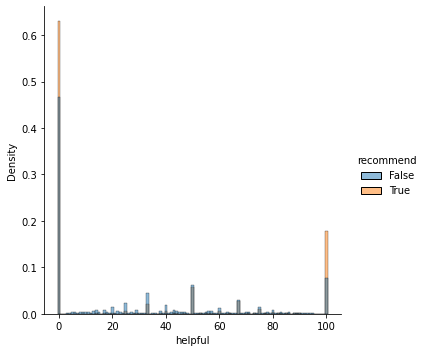

In [10]:
plot_sns(reviews,"helpful",hue='recommend')

We observe that when a review is found helpful by all user, the game has a great chance to be recommended. We then do the same plot for the _funny_ feature:

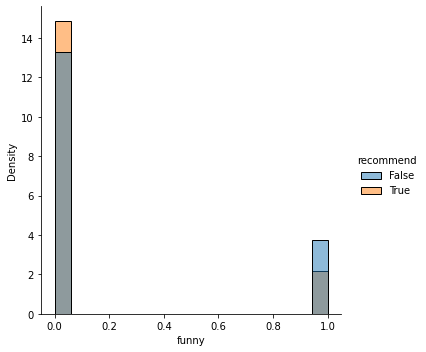

In [11]:
plot_sns(reviews,"funny",hue="recommend")

We don't observe anything specific.

## _users_ dataset

Let's have a look at this second dataset:

In [12]:
users.head()

,item_id,playtime,user_id
0,1250,2949,--000--
1,389570,121,--ace--
2,113200,1269,--ace--
3,730,35478,--ionex--
4,105600,842,--ionex--


In [13]:
print(get_missing(users))

Frequence of missing values in each columns:
 item_id     0.0
playtime    0.0
user_id     0.0
dtype: float64


In [14]:
print(get_dup(users))

Frequence of duplicated rows: 
0.03


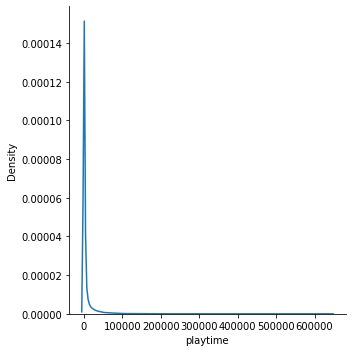

In [15]:
sns.displot(users,x='playtime',kind='kde')

This dataset doesn't have missing values, but we observe outliers if we look at the _playtime_. We will get rid of the values above 50000, assuming the time is in hours. It represents almost 6 years, which is huge for only one game. We then take care of the duplicated rows. 

In [16]:
users=users_preprocessing(users)

## _items_ dataset

Let's have a look at the last dataset:

In [17]:
items.head()

,app_name,developer,discount_price,early_access,genres,id,metascore,price,publisher,release_date,reviews_url,sentiment,specs,tags,title,url
0,Lost Summoner Kitty,Kotoshiro,4.49,False,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",761140.0,NaN,4.99,Kotoshiro,2018-01-04,http://steamcommunity.com/app/761140/reviews/?...,None,['Single-player'],"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...
1,Ironbound,Secret Level SRL,NaN,False,"['Free to Play', 'Indie', 'RPG', 'Strategy']",643980.0,NaN,Free To Play,"Making Fun, Inc.",2018-01-04,http://steamcommunity.com/app/643980/reviews/?...,Mostly Positive,"['Single-player', 'Multi-player', 'Online Mult...","['Free to Play', 'Strategy', 'Indie', 'RPG', '...",Ironbound,http://store.steampowered.com/app/643980/Ironb...
2,Real Pool 3D - Poolians,Poolians.com,NaN,False,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",670290.0,NaN,Free to Play,Poolians.com,2017-07-24,http://steamcommunity.com/app/670290/reviews/?...,Mostly Positive,"['Single-player', 'Multi-player', 'Online Mult...","['Free to Play', 'Simulation', 'Sports', 'Casu...",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...
3,弹炸人2222,彼岸领域,0.83,False,"['Action', 'Adventure', 'Casual']",767400.0,NaN,0.99,彼岸领域,2017-12-07,http://steamcommunity.com/app/767400/reviews/?...,None,['Single-player'],"['Action', 'Adventure', 'Casual']",弹炸人2222,http://store.steampowered.com/app/767400/2222/
4,Log Challenge,None,1.79,False,None,773570.0,NaN,2.99,None,None,http://steamcommunity.com/app/773570/reviews/?...,None,"['Single-player', 'Full controller support', '...","['Action', 'Indie', 'Casual', 'Sports']",None,http://store.steampowered.com/app/773570/Log_C...


In [18]:
print(get_missing(items))

Frequence of missing values in each columns:
 app_name          0.000062
developer         0.102664
discount_price    0.992998
early_access      0.000000
genres            0.102166
id                0.000062
metascore         0.918871
price             0.042852
publisher         0.250887
release_date      0.064324
reviews_url       0.000062
sentiment         0.223502
specs             0.020850
tags              0.005073
title             0.063795
url               0.000000
dtype: float64


In [19]:
print(get_dup(items))

Frequence of duplicated rows: 
0.0


- We observe that some of the feature will not be usefull: the features _url_ and *reviews_url* don't bring any information. The feature _title_ seems to be the same as the *app_name* for most of the cases. The *discount_price* and *metascore* features are not available for more than 90% of the data. Finally, the feature _publisher_ is useless, its information is already given by the column _developer_, because a developer as an unique publisher but a publisher can have multiple developers.  We therefore get rid of all these columns.

- We will replace the value in the _sentiment_ column with 3 values: 1 if it is positive, -1 if it is negative and 0 if there is no information. For the _price_ feature, we catch the prices with a regex, and set the price to 0 for free games. We also get rid of the rows that don't have a value for the row _id_ or _value_.

- We replace the missing value in the _developer_ row by 'Unknown'. For the missing release dates, we replace them by the median date.

In [20]:
items=items_preprocessing(items)

In [21]:
items.head()

,app_name,developer,early_access,genres,item_id,price,release_date,sentiment,specs,tags
0,Lost Summoner Kitty,Kotoshiro,0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",761140,4.99,2018-01-04,0,['Single-player'],"['Strategy', 'Action', 'Indie', 'Casual', 'Sim..."
1,Ironbound,Secret Level SRL,0,"['Free to Play', 'Indie', 'RPG', 'Strategy']",643980,0.00,2018-01-04,1,"['Single-player', 'Multi-player', 'Online Mult...","['Free to Play', 'Strategy', 'Indie', 'RPG', '..."
2,Real Pool 3D - Poolians,Poolians.com,0,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",670290,0.00,2017-07-24,1,"['Single-player', 'Multi-player', 'Online Mult...","['Free to Play', 'Simulation', 'Sports', 'Casu..."
3,弹炸人2222,彼岸领域,0,"['Action', 'Adventure', 'Casual']",767400,0.99,2017-12-07,0,['Single-player'],"['Action', 'Adventure', 'Casual']"
4,Log Challenge,Unknown,0,None,773570,2.99,2016-04-26,0,"['Single-player', 'Full controller support', '...","['Action', 'Indie', 'Casual', 'Sports']"


We can observe the distribution of the sentiment toward the games depending on the price (for prices under 45$).

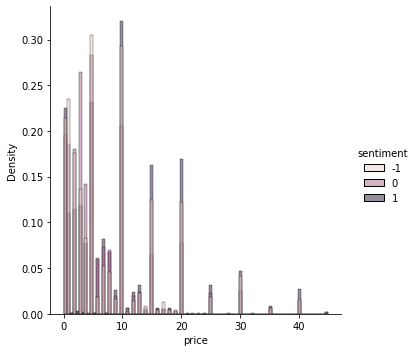

In [22]:
plot_sns(items[items.price<45],feature="price",hue='sentiment')

It seems that that expensive games are more appreciated.

We will take care of the last features (_tags_, _specs_, _genres_) in the next part.